## Region-based Segmentation

In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(192, 263, 3)

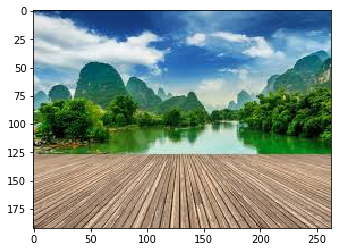

In [37]:
image = plt.imread('view.jpeg')
plt.imshow(image)
image.shape

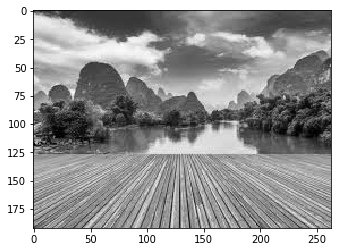

In [3]:
# convert color image to gray 
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [4]:
gray.shape

(192, 263)

### mean threshold segmentation

0.5175623838036483


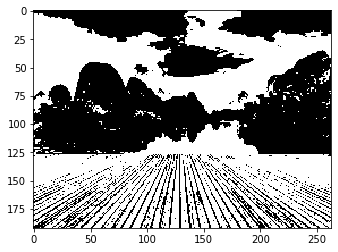

In [5]:
gray_base = gray.copy()
gray_r = gray_base.reshape(gray_base.shape[0]*gray_base.shape[1])
threshold = gray_r.mean()
print(threshold)
for i in range(gray_r.shape[0]):
    if gray_r[i] > threshold:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
        
gray_b2 = gray_r.reshape(gray_base.shape[0], gray_base.shape[1])
plt.imshow(gray_b2, cmap='gray')

129.78980513307985


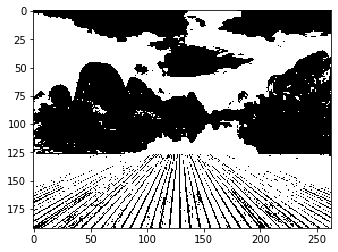

In [6]:
# opencv
import cv2

image_cv = cv2.imread('view.jpeg')
gray_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
threshhold = gray_cv.reshape((-1, 1)).mean()
print(threshhold)
ret, gray_cv = cv2.threshold(gray_cv, threshhold, 255, cv2.THRESH_BINARY)
plt.imshow(gray_cv, cmap='gray')

### 4 bins threshold segmentation

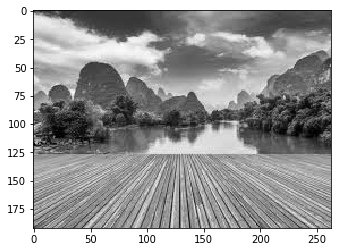

In [12]:
gray_base = gray.copy()
plt.imshow(gray_base, 'gray')

0.5175623838036483


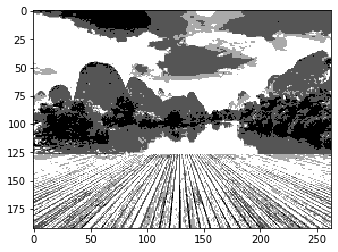

In [13]:
gray_r = gray_base.reshape(gray_base.shape[0]*gray_base.shape[1])
threshold1 = gray_r.mean()
print(threshold1)
for i in range(gray_r.shape[0]):
    if gray_r[i] > 0.6:
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
        
gray_b4 = gray_r.reshape(gray_base.shape[0], gray_base.shape[1])
plt.imshow(gray_b4, cmap='gray')

## Edge Detection Segmentation

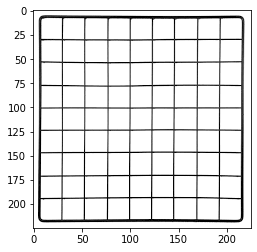

In [30]:
grid = plt.imread('grid.png')
grid_gray = rgb2gray(grid)
plt.imshow(grid_gray, cmap='gray')

In [31]:
sobel_horizontal = np.array([[1,   2,  1],
                             [0,   0,  0],
                             [-1, -2, -1]])
sobel_vertical   = np.array([[-1,  0,  1],
                             [-2,  0,  2],
                             [-1,  0,  1]])
kernel_laplace   = np.array([[1,   1,  1],
                             [1,  -8,  1],
                             [1,   1,  1]])

print('sobel horizontal: \n', sobel_horizontal)
print('')
print('sobel vertical: \n', sobel_vertical)
print('')
print('laplacian kernel: \n', kernel_laplace)

sobel horizontal: 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]

sobel vertical: 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

laplacian kernel: 
 [[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


In [32]:
out_h = ndimage.convolve(grid_gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(grid_gray, sobel_vertical, mode='reflect')
out_l = ndimage.convolve(grid_gray, kernel_laplace, mode='reflect')

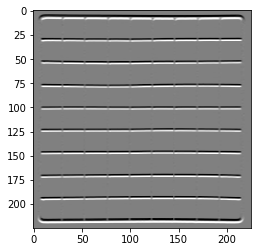

In [33]:
plt.imshow(out_h, cmap='gray')

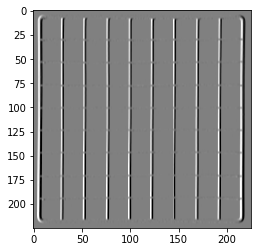

In [34]:
plt.imshow(out_v, cmap='gray')

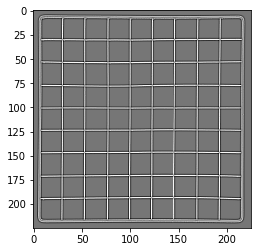

In [35]:
plt.imshow(out_l, cmap='gray')

## Clustering Segmentation

**k-means**

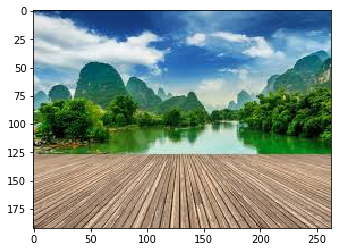

In [38]:
plt.imshow(image)

In [39]:
image_arr = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
image_arr.shape

(50496, 3)

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(image_arr)

In [46]:
set(kmeans.labels_)

{0, 1, 2, 3, 4}

In [51]:
image_arr.shape

(50496, 3)

ValueError: assignment destination is read-only